Importing Libraries

In [ ]:
# !pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# !pip install matplotlib seaborn glob2 ipython librosa numpy scipy soxr
# Before installing librosa we have to install other dependencies also because it has many dependencies in itself.

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob2 import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
audio_files = glob("C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main/*/*.wav")
print(audio_files)

['C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\103.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\110.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\15.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\27.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\38.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\41.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\44.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\62.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\69.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\78.wav', 'C:/Users/Sakshi/Desktop/DRDO NAVAL PROJECT/DRDO Project/DeepShip-main\\Cargo\\96.wav', 'C:/Users/Sakshi/Desktop/DRDO

In [3]:
# LABEL = SHIP TYPE

print(len(audio_files))


68


In [4]:
ipd.Audio(audio_files[50])

In [ ]:
# !pip install librosa

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# !pip show librosa

Name: librosa
Version: 0.11.0
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: C:\Users\Sakshi\AppData\Roaming\Python\Python312\site-packages
Requires: audioread, decorator, joblib, lazy_loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing_extensions
Required-by: 


In [5]:
import librosa


In [6]:
y, sr = librosa.load(audio_files[48])
# y -> raw data of the audio file
# sr -> sampling rate of the audio file

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [7]:
print(f'y: {y[:10]}')
print(f'y shape: {y.shape}')
print(f'sr: {sr}')

y: [0.02272516 0.03048344 0.02750517 0.02959497 0.02764862 0.02897607
 0.02752485 0.02820587 0.02755712 0.02850447]
y shape: (837900,)
sr: 22050


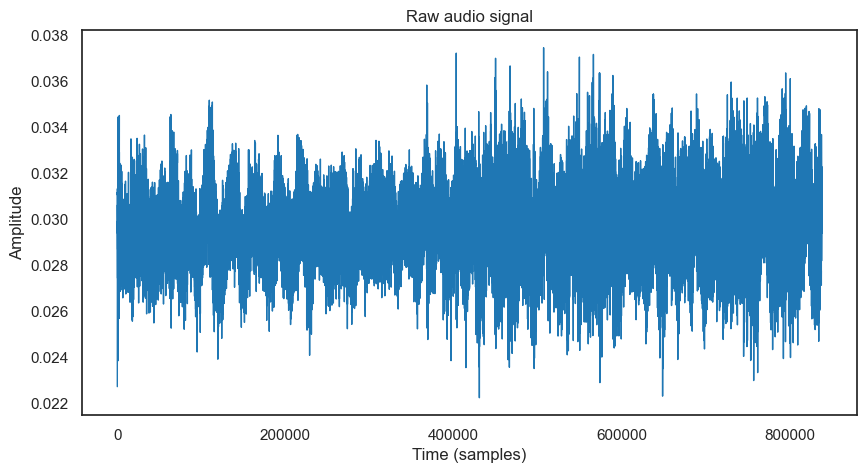

In [8]:
pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[0])
plt.title('Raw audio signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

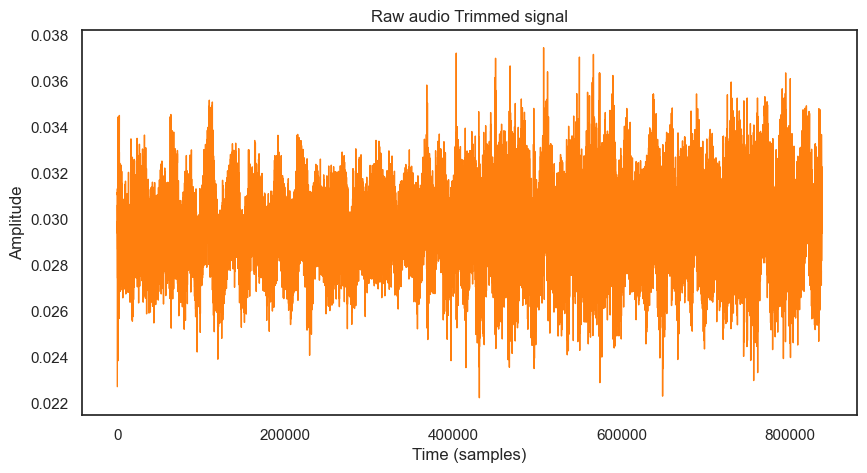

In [9]:
y_trimmed, _ = librosa.effects.trim(y,top_db=20)
#  help to trim(remove) empty spaces...plane lines 
pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[1])
plt.title('Raw audio Trimmed signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

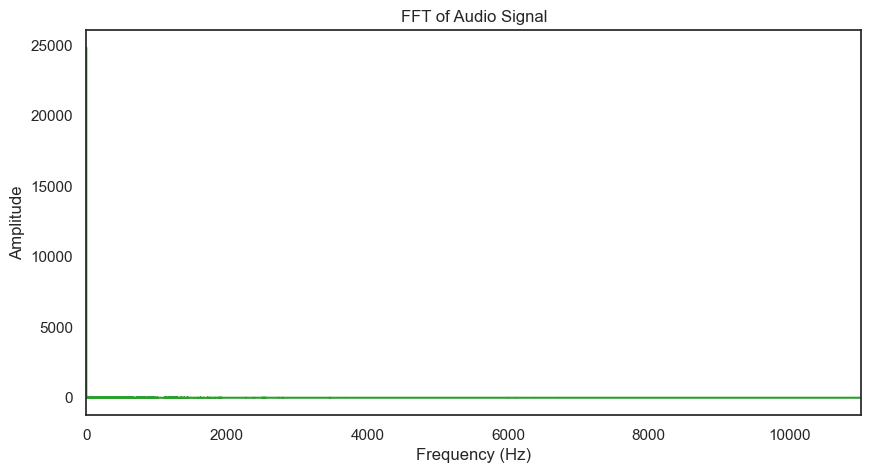

In [25]:
# Compute the Fast Fourier Transform (FFT) of the audio signal
# This will convert the time-domain signal into the frequency domain.
# The FFT is a powerful algorithm to compute the Discrete Fourier Transform (DFT) and its inverse.
fft_vals = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(fft_vals), 1/sr)

# Only take the positive frequencies
pos_mask = fft_freq >= 0
fft_freq = fft_freq[pos_mask]
fft_power = np.abs(fft_vals[pos_mask])

plt.figure(figsize=(10, 5))
plt.plot(fft_freq, fft_power, color=color_pal[2])
plt.title('FFT of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, sr/2])
plt.show()

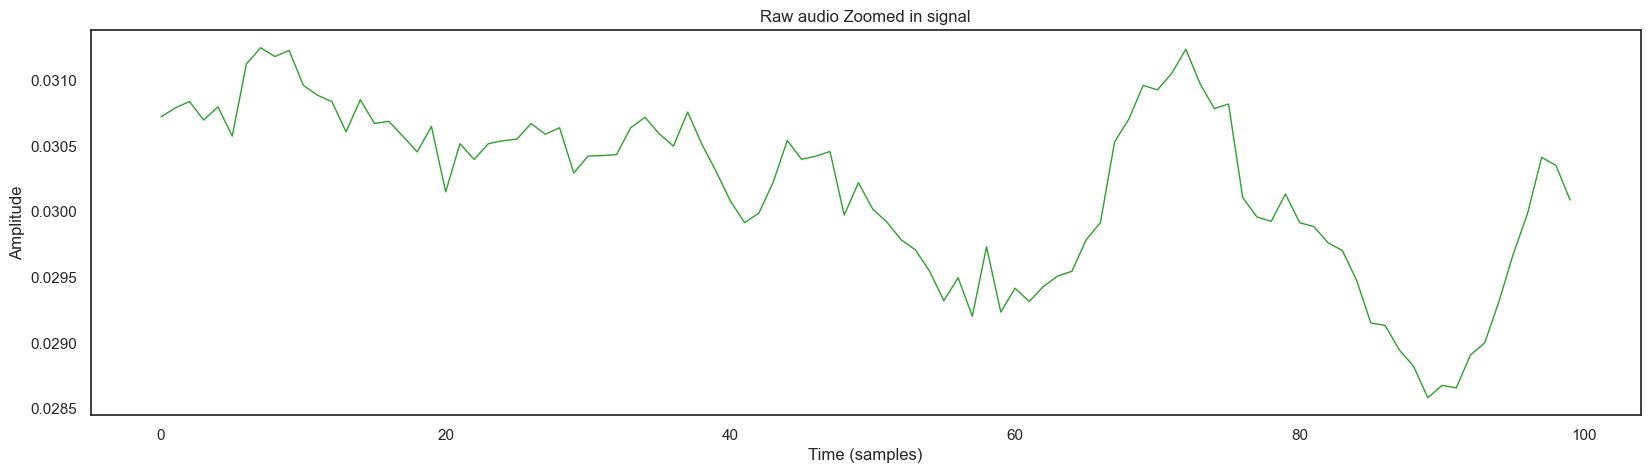

In [23]:
pd.Series(y[2000:2100]).plot(figsize=(20, 5),lw = 1,color = color_pal[2])
plt.title('Raw audio Zoomed in signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [22]:
# Calculate average power (mean of squared amplitude)
avg_power = np.mean(fft_power ** 2)

# Intensity is often proportional to power for audio signals
avg_intensity = avg_power

# Sample rate is already given by sr
avg_sample_rate = sr

# Loudness can be estimated as the mean dB value of the FFT power (avoid log(0) by adding small epsilon)
epsilon = 1e-10
loudness_db = 10 * np.log10(fft_power + epsilon)
avg_loudness = np.mean(loudness_db)

print(f"Average Power: {avg_power}")
print(f"Average Intensity: {avg_intensity}")
print(f"Sample Rate: {avg_sample_rate}")
print(f"Average Loudness (dB): {avg_loudness}")

Average Power: 1470.9379061425236
Average Intensity: 1470.9379061425236
Sample Rate: 22050
Average Loudness (dB): -7.693008282519627


In [26]:
# Compute the Short-Time Fourier Transform (STFT)
# This will give us a time-frequency representation of the audio signal
trans = librosa.stft(y)
spect_db = librosa.amplitude_to_db(np.abs(trans), ref=np.max)
spect_db.shape


(1025, 1637)

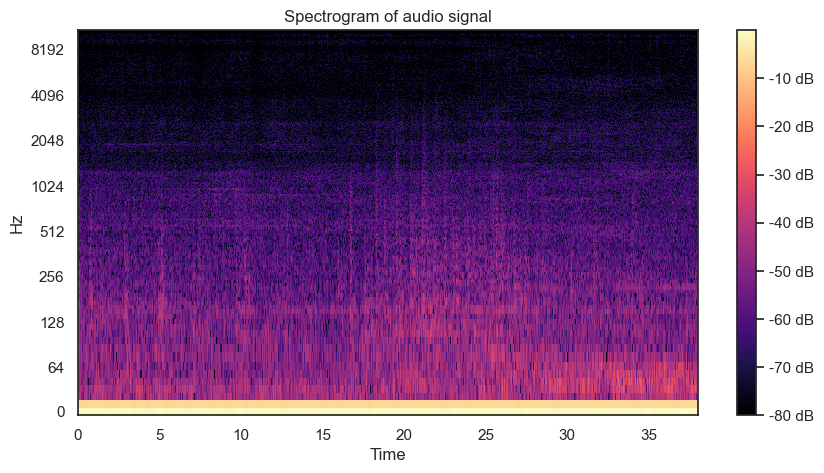

In [27]:
# Plot the transformed audio data
fig , ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(spect_db,x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram of audio signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

Mel Spectrogram

In [28]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.amplitude_to_db(S, ref=np.max)



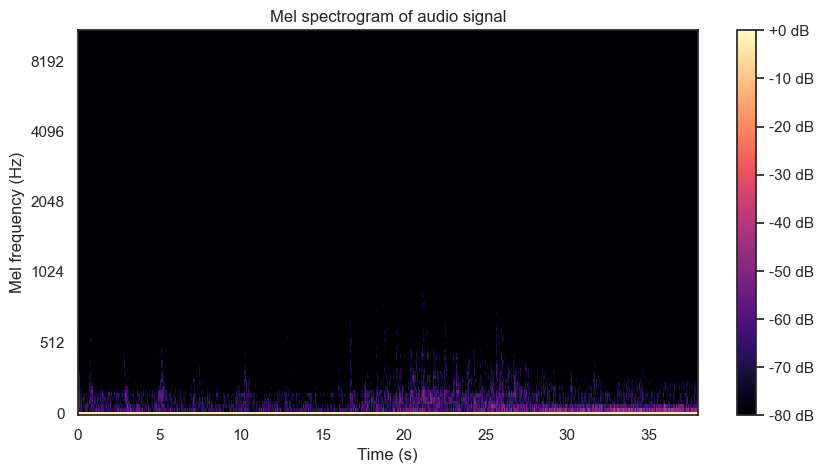

In [29]:
fig,ax =  plt.subplots(figsize=(10, 5))
plt.title('Mel spectrogram of audio signal')
# plot the mel spectrogram

img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(img, format="%+2.f dB")
plt.xlabel('Time (s)')
plt.ylabel('Mel frequency (Hz)')  
plt.show()
